# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 3: *HistogramEqualization*
Adjust the intensity of an image according to its histogram
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, plotImageL, createImageL, createVectorI
from PlotUtilities import plotHistogram
from ImageOperatorsUtilities import computeHistogram

# Iteration
from timeit import itertools

### Parameters:
    imageName = Input image name
    scale = Scale the gray levels
    translation = Value added to the gray levels

In [2]:
imageName = "Horse.png"
scale = 1.0
translation = 0.0

### Read and show input image

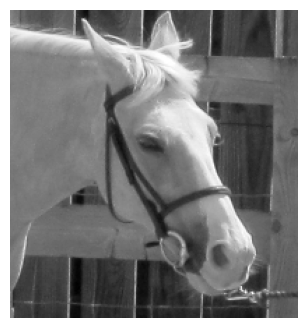

In [3]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter3/Input/")
inputImage, width, height  = imageReadL(pathToDir + imageName)
plotImageL(inputImage, figureSize = 4)

### Compute and show histogram of the input image

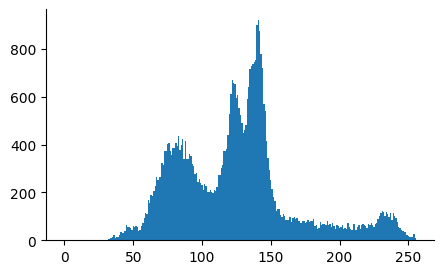

In [4]:
inputHistogram = computeHistogram(inputImage)
plotHistogram(inputHistogram)

### Histogram Equalization

In [5]:
# Vector of integers values to store the number of times a pixel value is repeated
accumulateHistogram = createVectorI(256)

# Create images to store the result
outputImage = createImageL(width, height)

# Distribute the values of the input histogram into the output histogram
sumLevels = 0.0
normalization = float(width * height) / 256
for level in range(0, 256):
    sumLevels += inputHistogram[level]
    accumulateHistogram[level] = sumLevels / normalization
    
# Set the pixels in the output image according to the accumulate histogram
for x,y in itertools.product(range(0, width), range(0, height)):
    outputImage[y,x] = accumulateHistogram[inputImage[y,x]]

### Compute and show histogram of the output image

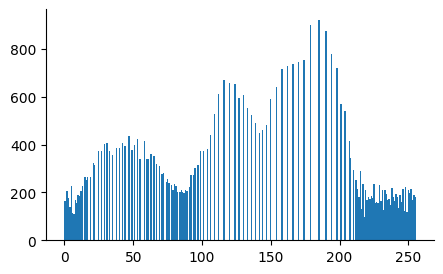

In [6]:
# Compute histogram of the output image
outputHistogram = computeHistogram(outputImage)
plotHistogram(outputHistogram)

### Show output image

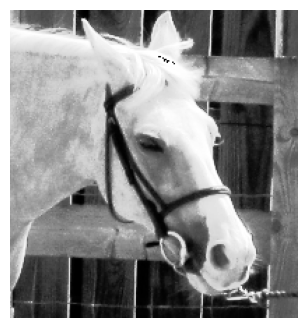

In [7]:
plotImageL(outputImage, figureSize = 4)